Import các thư viện cần thiết

In [6]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()  
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))  
sys.path.append(project_root)

# Import các hàm từ json_handle
from ml.preprocess.utils.json_handle import (
    merge_data_with_paths,
    read_json,
    merge_json_files,
    write_json
)

ĐỌC DỮ LIỆU TRUNG GIAN ĐỂ EDA 

In [7]:


# READ JSON 
path = "../data/interim/batdongsancomvn/dat/interim_merged_data.json"
data = read_json(path)
for entry in data:
    print(entry.get("frontage"))
df = pd.DataFrame(data)

# print(df.head())

3.6
5.0
4.0
4.0
5.5
5.52
None
None
4.6
None
7.5
None
4.0
6.0
10.2
5.0
10.0
16.0
15.0
10.45
8.0
5.0
None
3.9
None
None
None
4.5
None
5.0
5.68
6.35
None
6.4
None
None
None
None
4.5
5.5
8.0
None
None
5.0
5.5
None
4.0
5.65
4.0
5.0
3.9
5.0
None
4.0
10.0
None
3.6
4.0
None
8.35
4.5
5.0
None
None
None
5.2
4.0
4.0
9.0
6.5
5.5
7.8
4.6
45.0
4.0
4.0
11.0
None
None
4.0
5.0
5.0
5.0
3.5
6.0
5.0
17.2
None
4.0
4.0
7.5
50.0
5.1
40.0
None
None
5.0
6.0
None
4.0
5.0
5.0
77.0
17.2
4.9
7.7
6.0
6.4
4.6
57.0
7.2
4.0
4.5
5.0
7.0
5.0
None
6.0
None
5.5
6.15
21.0
5.8
8.9
4.0
18.56
4.06
5.9
10.9
18.5
4.7
10.0
5.0
5.5
None
None
4.0
5.0
6.0
7.25
5.0
None
4.5
4.0
None
7.0
4.2
7.0
None
4.0
4.0
4.0
5.1
None
7.0
15.0
19.0
4.4
6.0
None
None
5.4
5.4
6.27
None
None
68.0
None
None
5.0
5.6
None
10.7
8.0
4.5
14.0
5.0
None
6.56
5.0
4.0
4.0
4.7
4.0
None
5.0
None
4.0
4.0
7.93
4.0
5.0
4.0
4.0
5.5
None
6.8
4.2
4.0
5.0
6.0
5.0
None
12.0
4.2
5.33
5.0
10.0
5.0
None
None
5.5
5.52
None
None
3.1
None
None
5.5
None
4.0
6.0
4.2
None
6.0
5.

In [8]:
# Tính toán các thống kê cơ bản
basic_stats = df.describe().T  

# Thêm cột 'median' vì pandas describe() không bao gồm median
# basic_stats['median'] = df.median()

# Chọn và sắp xếp các cột theo thứ tự mong muốn
basic_stats = basic_stats[['mean', 'std', 'min', 'max']]

# Hiển thị các thống kê cơ bản
print(basic_stats)

                         mean          std     min            max
frontage            12.170175    42.728102   1.142     930.000000
access_road_width    9.597043    11.448082   1.000     208.000000
area               549.544205  6601.973144  10.200  370000.000000
longitude          105.894617     2.748421   0.000     115.826343
latitude            19.749933     3.299665   0.000      22.753192


So Sánh frontage và access_road_width

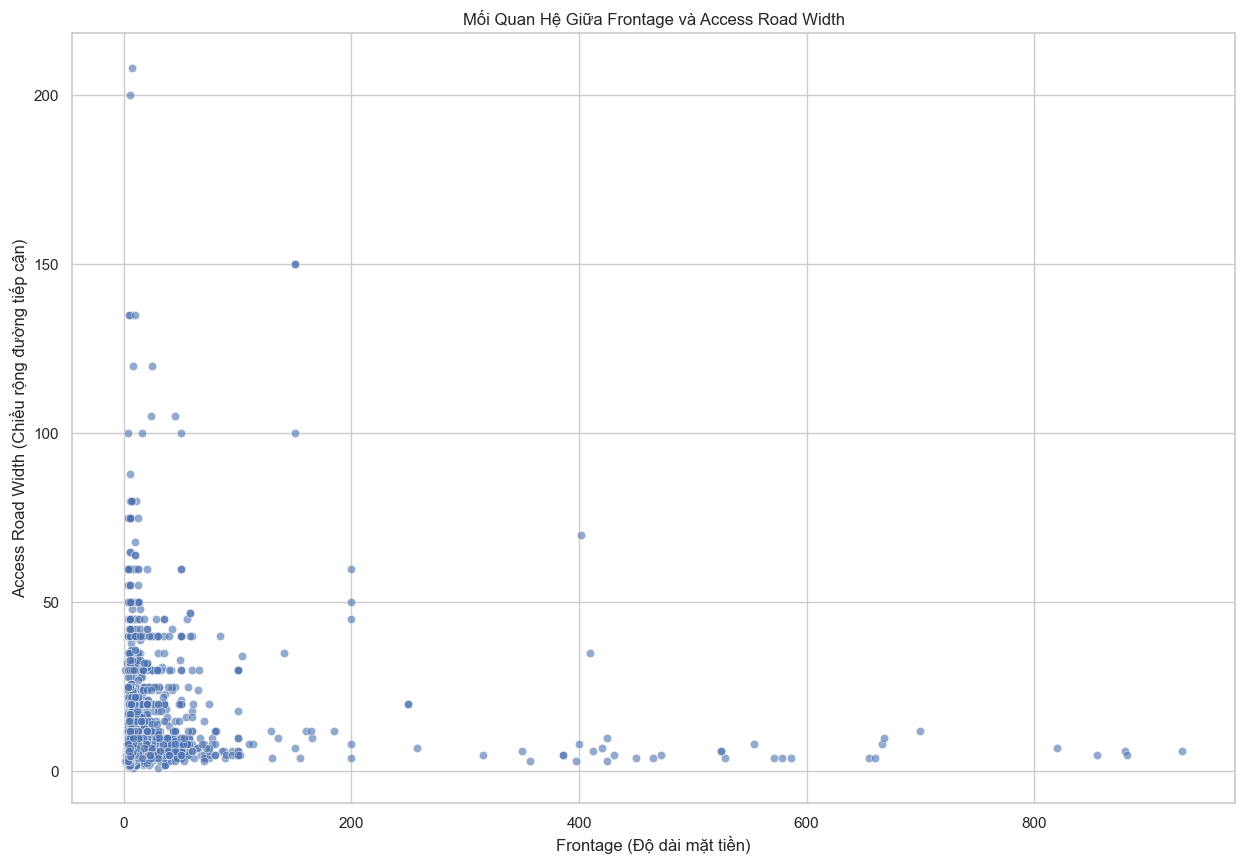

In [9]:
# Thiết lập phong cách cho biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ phân tán
plt.figure(figsize=(15, 10))
sns.scatterplot(x='frontage', y='access_road_width', data=df, alpha=0.6)

# Thêm tiêu đề và nhãn trục
plt.title('Mối Quan Hệ Giữa Frontage và Access Road Width')
plt.xlabel('Frontage (Độ dài mặt tiền)')
plt.ylabel('Access Road Width (Chiều rộng đường tiếp cận)')

# Hiển thị biểu đồ
plt.show()

In [10]:
# Đếm số lượng mẫu có 'frontage' lớn hơn 100
num_frontage_gt_100 = (df['frontage'] > 100).sum()

print(f"Số lượng mẫu có 'frontage' lớn hơn 100: {num_frontage_gt_100}")

num_width_gt_100 = (df['access_road_width'] > 100).sum()

print(f"Số lượng mẫu có 'access_road_width' lớn hơn 100: {num_width_gt_100}")

Số lượng mẫu có 'frontage' lớn hơn 100: 66
Số lượng mẫu có 'access_road_width' lớn hơn 100: 15
